- Motivation: optimal decision boundary
- Support vectors and margin
- Objective function: maximizing margin
- Non-linear classification: soft matgin
- Kernel Trick for non-linear classification
- Multi-class SVM

In [194]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D

# use seaborn plotting defaults
import seaborn as sns
sns.set_theme()

# our libraries
from utils import plot_svc_decision_function

## Motivation: Optimal Decision Boundary

- Support Vector Machines (SVMs) are powerful supervised learning algorithms used both for **classification** or for **regression**. 
- SVMs are a **discriminative** classifier: that is, they draw a boundary between clusters of data.

#### Create dataset

Let's show a quick example of support vector classification. First we need to create a dataset:

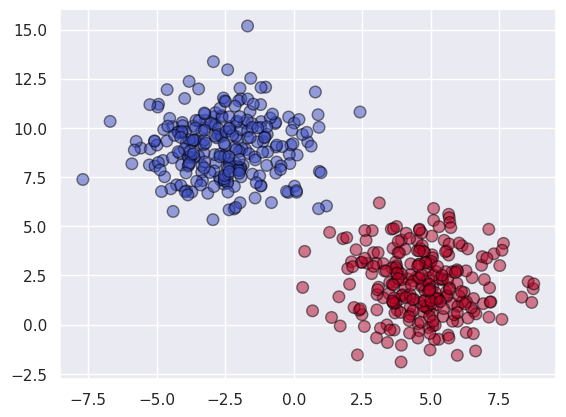

In [195]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=1.6, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, s=70, edgecolors='black', cmap=plt.cm.coolwarm, alpha=0.5)
plt.show()

#### Decision Boundary

- When the data are **linearly separable**, one can draw many different linear decision boundary that all of them correctly classify training data.
- But the important question is which one is optimal?

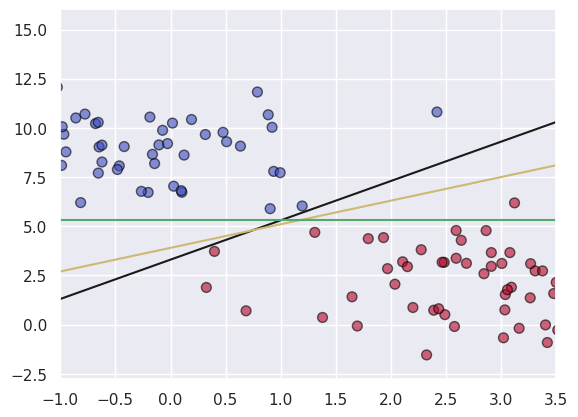

In [196]:
# plot data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)

# draw three different separators
x_values = np.linspace(-1, 3.5)
for w, b, c in [(2, 3.3, 'k'), (1.2, 3.9, 'y'), (0.0, 5.3, 'g')]:
    plt.plot(x_values, w * x_values + b, c)

plt.xlim(-1, 3.5)
plt.show()

### Support Vector Machines: Maximizing the *Margin*

- Support vector machines are one way to address this quesion.
- What support vector machined do is to not only draw a line, but consider a *region* about the line of some given width.

Here's an example of what it might look like:

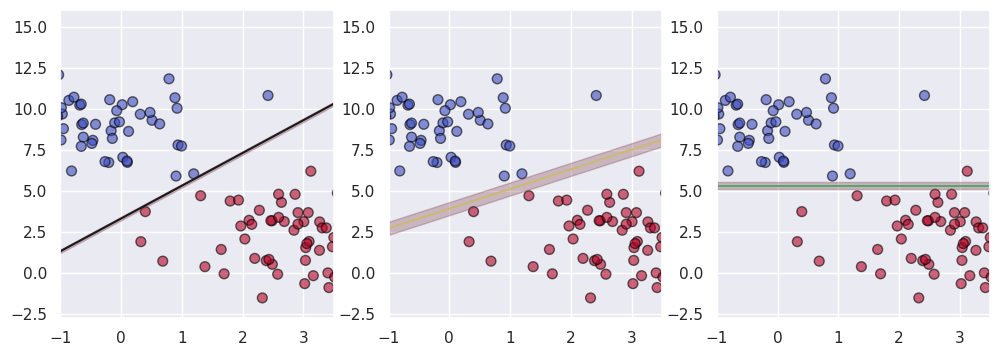

In [197]:
plt.figure(figsize=(12, 4))

# draw separators and margins
x_values = np.linspace(-1, 3.5)
for i, (w, b, c, m) in enumerate([(2, 3.3, 'k', 0.11), (1.2, 3.9, 'y', 0.40), (0.0, 5.30, 'g', 0.2)]):
    plt.subplot(1, 3, i + 1)
    
    # draw data
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
    y_values = w * x_values + b
    
    # draw separator and margin
    plt.plot(x_values, y_values, c)
    plt.fill_between(x_values, y_values - m, y_values + m, edgecolor='none', color='#7D3C4A', alpha=0.3)
    plt.xlim(-1, 3.5)

plt.show()

#### Fitting a Support Vector Machine

Here, we'll use scikit-learn to train a SVM classifier.

In [198]:
from sklearn.svm import SVC

# create Support Vector Classifier using a linear kernel
clf = SVC(kernel='linear')

# train the classifier
clf.fit(X, y)

SVC(kernel='linear')

#### Plot decision boundary for SVM

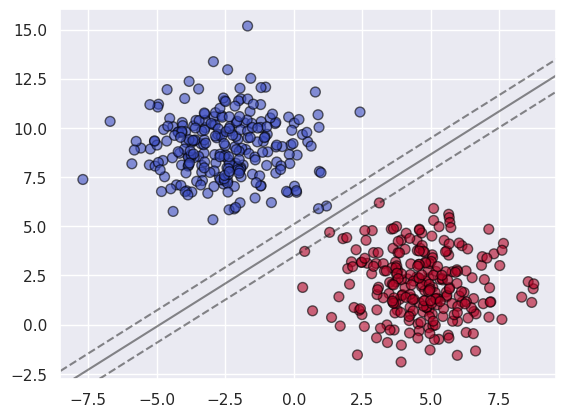

In [199]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)
plt.show()

### Support Vectors

- Notice that the dashed lines touch a couple of the points: these points are the pivotal pieces of this fit, and are known as the *support vectors* (giving the algorithm its name).

In scikit-learn, these are stored in the ``support_vectors_`` attribute of the classifier:

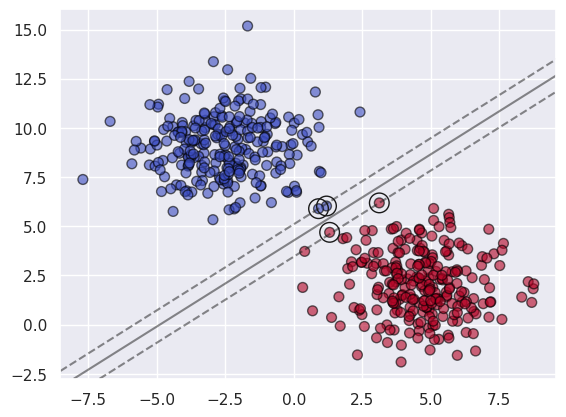

In [200]:
plt.figure()
# plot data and margin
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)

# plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');

Let's explore how the distribution of points affects the support vectors and the decision boundary.

In [201]:
fig= plt.figure()

def plot_svc_decision_function_2(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
        
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    
    # plot the margins
    ax.contour(X, Y, P, colors='k', 
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])


def plot_svm(N=10):
    
    # create data and classify
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear', gamma='scale', C=1)
    clf.fit(X, y)
    
    # show classification result
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function_2(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none') # Marking the support vectors in the plot
    plt.show()
    
N = widgets.IntSlider(value=10, min=10, max=200, step=10, description='N:')
widgets.interact(plot_svm, N=N);

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=10, description='N:', max=200, min=10, step=10), Output()), _dom_classes…

**Notice that only the support vectors matter**
- that is, if you moved any of the other points without letting them cross the decision boundaries, they would have no effect on the classification results!

## Soft Margin

In [202]:
fig = plt.figure()

def plot_svc_decision_function_2(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
        
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    
    # plot the margins
    ax.contour(X, Y, P, colors='k', 
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])


def plot_svm(N=10, C=1e-1):
    
    # create data and classify
    X, y = make_blobs(n_samples=300, centers=2, random_state=0, cluster_std=0.50)

    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear',gamma='scale', C=C)
    clf.fit(X, y)
    
    # display classification results
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function_2(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none')
    plt.show()
    
N = widgets.IntSlider(value=10, min=10, max=200, step=10, description='N:')
sml = widgets.FloatSlider(value=1e-1, min=1e-1, max=2.0, step=1e-1, description='C:') #determins the level of error
widgets.interact(plot_svm, N=N, C=sml);

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=10, description='N:', max=200, min=10, step=10), FloatSlider(value=0.1, …

## Non-linear Classiffication: Kernels

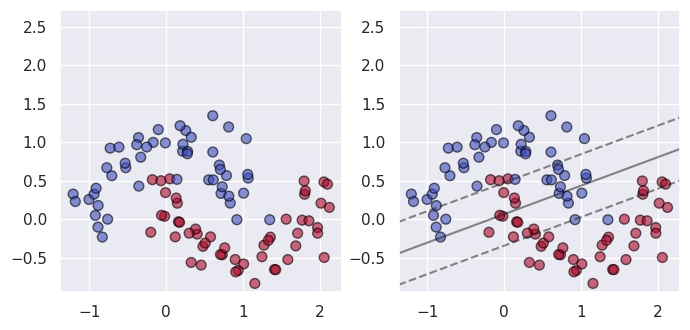

In [213]:
from sklearn.datasets import make_blobs

# create dataset
#X, y = make_blobs(100, centers=2, cluster_std=40, random_state=3)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.2, random_state=0)
# vreate and train classifier
clf = SVC(kernel='linear').fit(X, y)

# show classification results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plt.axis('square')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)
plt.axis('square');

**Kernel**: A functional transformation on input data.

#### kernel: radial basis function

$$r(x, 0) = e^{-(x_0^2 + x_1^2)}$$

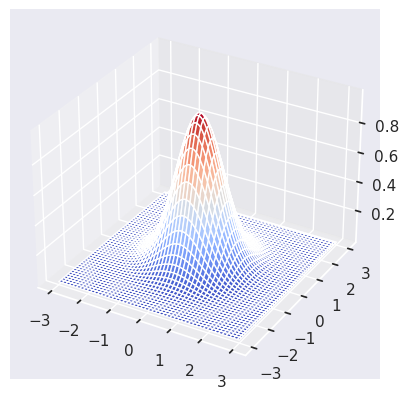

In [214]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
R = np.exp(-(X1 ** 2 + X2 ** 2))
ax.plot_surface(X1, X2, R, cmap=plt.cm.coolwarm)
plt.show()

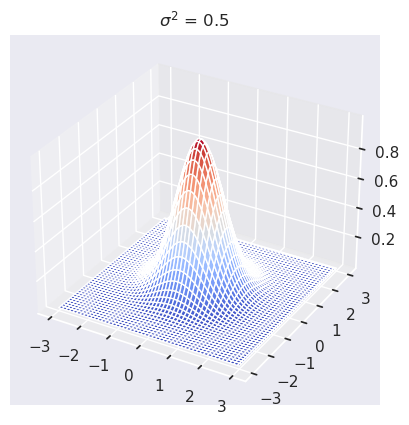

In [215]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

sigma2 = 0.5
R1 = np.exp(-(X1 ** 2 + X2 ** 2) / (2 * sigma2))
surf = ax.plot_surface(X1, X2, R1, cmap=plt.cm.coolwarm)
plt.title('$\sigma^2$ = {:.1f}'.format(sigma2))
plt.show()

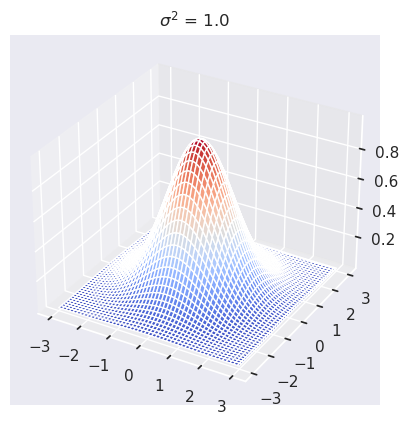

In [216]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

sigma2 = 1.0
R1 = np.exp(-(X1 ** 2 + X2 ** 2) / (2 * sigma2))
surf = ax.plot_surface(X1, X2, R1, cmap=plt.cm.coolwarm)
plt.title('$\sigma^2$ = {:.1f}'.format(sigma2))
plt.show()

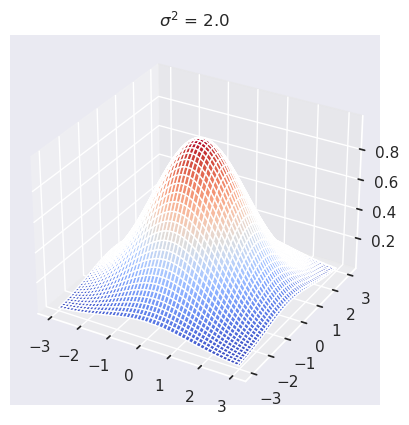

In [217]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

sigma2 = 2.0
R1 = np.exp(-(X1 ** 2 + X2 ** 2) / (2 * sigma2))
surf = ax.plot_surface(X1, X2, R1, cmap=plt.cm.coolwarm)
plt.title('$\sigma^2$ = {:.1f}'.format(sigma2))
plt.show()

In [218]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

If we plot this along with our data, we can see the effect of it:

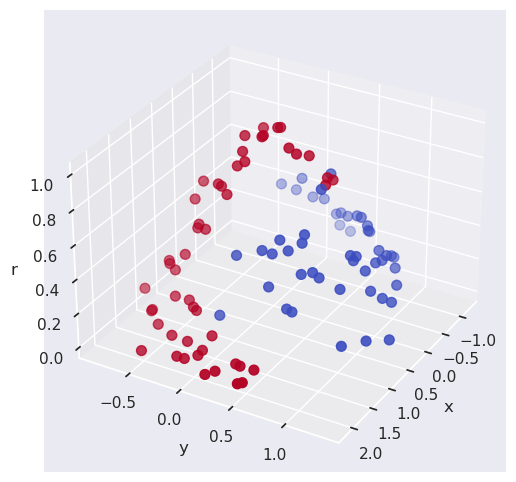

In [219]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='coolwarm')
ax.view_init(elev=30, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()

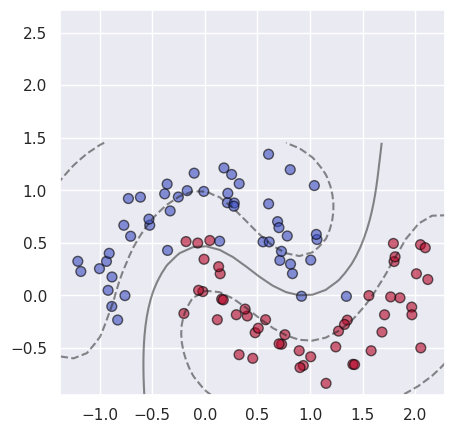

In [220]:
clf = SVC(kernel='rbf', gamma='scale')
clf.fit(X, y)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)
#plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');
plt.axis('square')
plt.show()